<a href="https://colab.research.google.com/github/dareng5/PythonProject1/blob/master/Unit3Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick

missing_values = ['na']
df = pd.read_csv(
    'https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv'
    , na_values = missing_values
    )

#df.head()
#df.dtypes
#df.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#select and wrangling data

#focus on a high school network that has four high school locations on Algebra tests
sch = df[(df['School Name']=='New Visions Charter High School for Advanced Math')&
         (df['Regents Exam']=='Common Core Algebra')]

#drop unwanted columns
sch = sch.drop(['Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above',
                'Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR'], axis=1)

#drop satisfactory(s) rows as they are incomparable
sch = sch[(sch['Mean Score']!='s')]

#drop duplicates
sch.drop_duplicates(keep='first',inplace=True)

#rename school names based on their location
sch.loc[df['School DBN']=='84X539','School Name'] = 'A.M.S.'
sch.loc[df['School DBN']=='84X202','School Name'] = 'A.M.S. II'
sch.loc[df['School DBN']=='84K738','School Name'] = 'A.M.S. III'
sch.loc[df['School DBN']=='84Q320','School Name'] = 'A.M.S. IV'

#convert object to numeric
sch['Mean Score'] = pd.to_numeric(sch['Mean Score'], errors = 'coerce')
sch['Percent Scoring 65 or Above'] = pd.to_numeric(sch['Percent Scoring 65 or Above'], errors = 'coerce')
sch['Number Scoring 80 or Above'] = pd.to_numeric(sch['Number Scoring 80 or Above'], errors = 'coerce')

#create total score per class
sch['Total Score'] = sch['Total Tested'] * sch['Mean Score']

#grouping by year and schools and reset_index to make school name reappears on each row
schgrp = sch.groupby(['School Name','Year'])['Total Tested','Total Score','Number Scoring 80 or Above'].sum().reset_index()

#create new measures on school level
schgrp['Total Mean'] = schgrp['Total Score'] / schgrp['Total Tested']
schgrp['Total Percent Scoring 80 or Above'] = schgrp['Number Scoring 80 or Above'] / schgrp['Total Tested']

schgrp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,School Name,Year,Total Tested,Total Score,Number Scoring 80 or Above,Total Mean,Total Percent Scoring 80 or Above
0,A.M.S.,2015,569,34505.6,9,60.642531,0.015817
1,A.M.S.,2016,1057,67674.6,39,64.025166,0.036897
2,A.M.S.,2017,1058,71294.6,113,67.386200,0.106805
3,A.M.S. II,2015,690,42825.9,0,62.066522,0.000000
4,A.M.S. II,2016,1555,108179.0,215,69.568489,0.138264
5,A.M.S. II,2017,1003,70393.6,184,70.183051,0.183450
6,A.M.S. III,2015,655,39932.4,0,60.965496,0.000000
7,A.M.S. III,2016,825,57050.6,78,69.152242,0.094545
8,A.M.S. III,2017,702,49309.9,108,70.242023,0.153846
9,A.M.S. IV,2016,625,41918.3,43,67.069280,0.068800


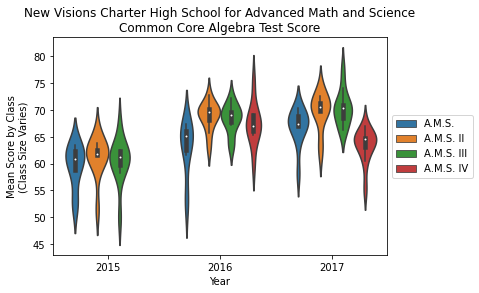

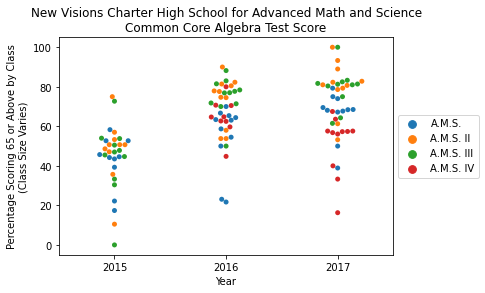

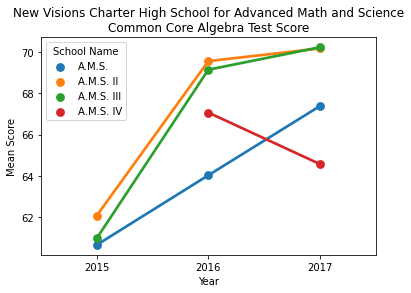

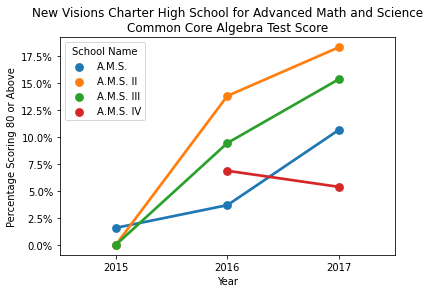

In [3]:
#plot graph

#on class level
#mean score for each class
c1 = sns.violinplot(x='Year', y='Mean Score', hue='School Name', hue_order=['A.M.S.','A.M.S. II','A.M.S. III','A.M.S. IV'], data=sch)
c1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.title('New Visions Charter High School for Advanced Math and Science\nCommon Core Algebra Test Score')
plt.ylabel('Mean Score by Class\n(Class Size Varies)')
plt.show(c1)

#percentage scoring 65 or above for each class
c2 = sns.swarmplot(x='Year', y='Percent Scoring 65 or Above', hue='School Name', hue_order=['A.M.S.','A.M.S. II','A.M.S. III','A.M.S. IV'], data=sch)
c2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.title('New Visions Charter High School for Advanced Math and Science\nCommon Core Algebra Test Score')
plt.ylabel('Percentage Scoring 65 or Above by Class\n(Class Size Varies)')
plt.show(c2)

#on school level
#mean score for each school
g1 = sns.pointplot(x='Year', y='Total Mean', hue='School Name', data=schgrp)
plt.title('New Visions Charter High School for Advanced Math and Science\nCommon Core Algebra Test Score')
plt.ylabel('Mean Score')
plt.show(g1)

#percenrage scoring 80 or above for each school
g2 = sns.pointplot(x='Year', y='Total Percent Scoring 80 or Above', hue='School Name', data=schgrp)
g2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('New Visions Charter High School for Advanced Math and Science\nCommon Core Algebra Test Score')
plt.ylabel('Percentage Scoring 80 or Above')
plt.show(g2)
